# **HISTOGRAMS**

#### IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Connect to database
conn = sqlite3.connect('my_analysis.db')

In [4]:
# Check
query = "SELECT * FROM main LIMIT 5"
pd.read_sql_query(query, conn) 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


#### DEMO: BASIC SQL QUERIES

Count the number of rows in the table

In [5]:
query = "SELECT COUNT(*) FROM main"
pd.read_sql_query(query, conn)

,COUNT(*)
0,65437


List all tables

In [6]:
query = "SELECT name AS Table_Name FROM sqlite_master WHERE type == 'table'"
pd.read_sql_query(query, conn)

,Table_Name
0,main


Group Data by Age

In [7]:
query = "SELECT Age, COUNT(*) AS count FROM main GROUP BY Age ORDER BY count DESC"
pd.read_sql_query(query, conn)

,Age,count
0,25-34 years old,23911
1,35-44 years old,14942
2,18-24 years old,14098
3,45-54 years old,6249
4,55-64 years old,2575
5,Under 18 years old,2568
6,65 years or older,772
7,Prefer not to say,322


---

#### VISUALIZING THE DISTRIBUTION OF DATA (HISTOGRAMS)

Histogram of `CompTotal` (Total Compensation)

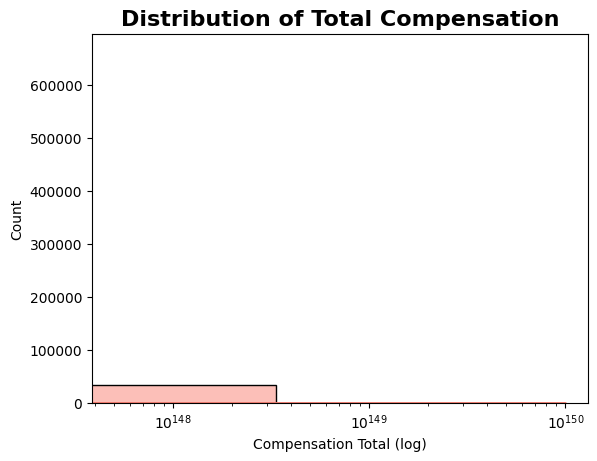

In [8]:
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
comp = pd.read_sql_query(query, conn)

sns.histplot(comp, x='CompTotal', bins=30, kde=True, color='salmon')
plt.title("Distribution of Total Compensation", fontsize=16, fontweight='bold')
plt.xlabel("Compensation Total (log)")
plt.xscale('log')

plt.show()

Histogram of `YearsCodePro` (Years of Professional Coding Experience)

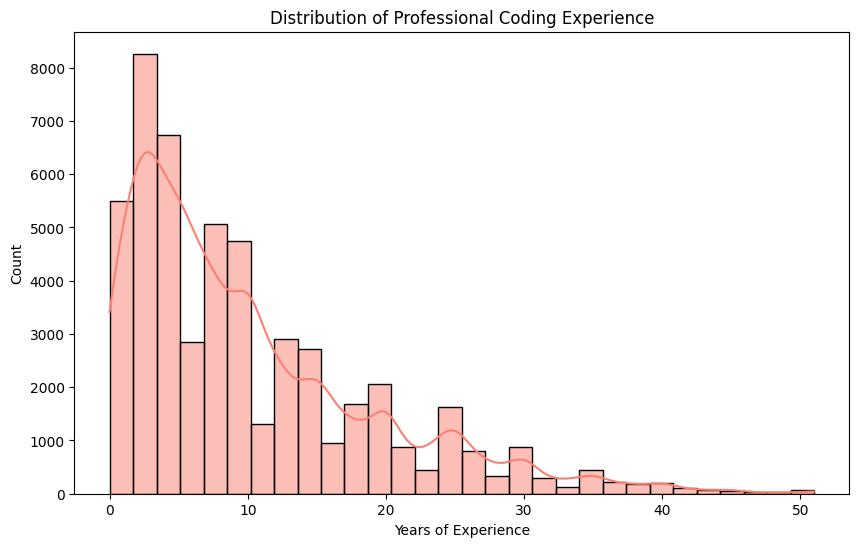

In [9]:
query = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
exp_df = pd.read_sql_query(query, conn)

exp_map = {
    'Less than 1 year' : 0,
    'More than 50 years': 51
}

exp_df['YearsCodePro'] = exp_df['YearsCodePro'].replace(exp_map).astype('int')

plt.figure(figsize=(10,6))
sns.histplot(exp_df, x='YearsCodePro', bins=30, kde=True, color='salmon')

plt.title("Distribution of Professional Coding Experience")
plt.xlabel('Years of Experience')
plt.show()

---

#### VISUALIZING RELATIONSHIP IN DATA

Histogram Comparison of `CompTotal` by `Age` Group

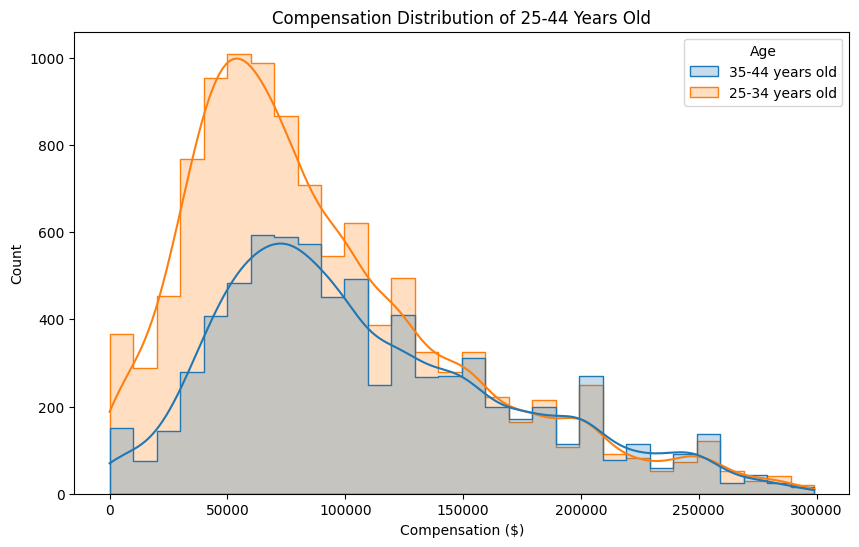

In [29]:
query = "SELECT Age, CompTotal AS Total_Comp FROM main ORDER BY Total_Comp DESC"
ca_df = pd.read_sql_query(query, conn).dropna()

filtered = ca_df[(ca_df['Total_Comp'] < 300000) &
                 (ca_df['Age'].isin(['25-34 years old', '35-44 years old']))]

plt.figure(figsize=(10,6))
sns.histplot(filtered, x='Total_Comp', bins=30, kde=True, color='salmon', hue='Age', element='step')

plt.title('Compensation Distribution of 25-44 Years Old')
plt.xlabel('Compensation ($)')

plt.show()

Histogram of TimeSearching for Different Age Groups

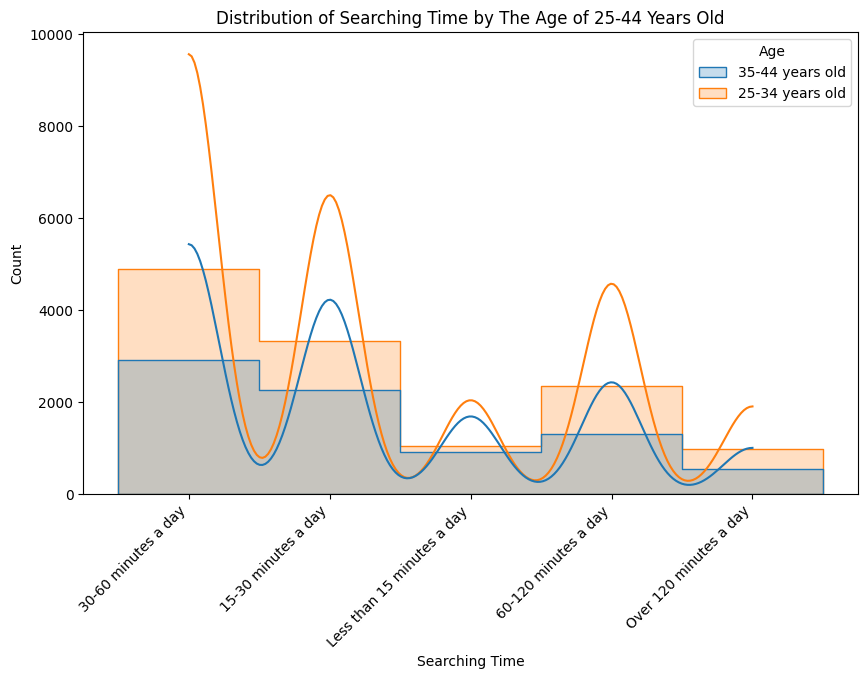

In [36]:
query = "SELECT Age, TimeSearching FROM main"
at_df = pd.read_sql_query(query, conn).dropna()

filtered = at_df[at_df['Age'].isin(['25-34 years old', '35-44 years old'])]

plt.figure(figsize=(10,6))
sns.histplot(filtered, x='TimeSearching', hue='Age', discrete=True, element='step', kde=True)
plt.title('Distribution of Searching Time by The Age of 25-44 Years Old')
plt.xlabel('Searching Time')
plt.xticks(rotation=45, ha='right')

plt.show()

---

#### VISUALIZING THE COMPOSITION DATA

Histogram of Most Desired Databases (`DatabaseWanToWorkWith`)

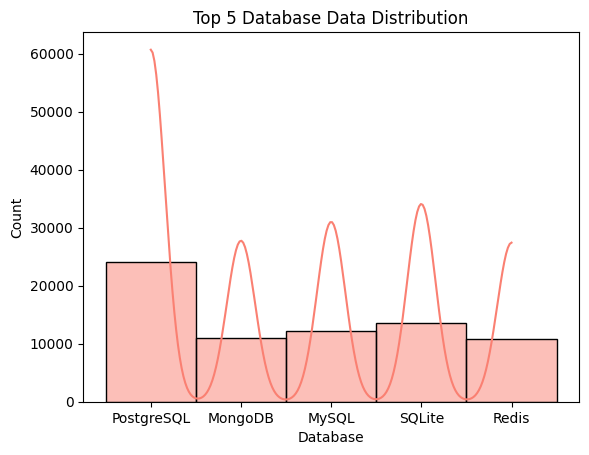

In [60]:
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
database_df = pd.read_sql_query(query, conn)

# Fix database column values
database_df['Clean_DatabaseWantToWorkWith'] = database_df['DatabaseWantToWorkWith'].str.split(';')
db_df = database_df.explode('Clean_DatabaseWantToWorkWith')

# Filter top 5 database
top_db = db_df['Clean_DatabaseWantToWorkWith'].value_counts().head()
filtered = db_df[db_df['Clean_DatabaseWantToWorkWith'].isin(list(top_db.index))]

# Histogram
sns.histplot(filtered, x='Clean_DatabaseWantToWorkWith', discrete=True, kde=True, color='salmon')

plt.title('Top 5 Database Data Distribution')
plt.xlabel('Database')

plt.show()

Histogram of Preferred Work Locations (`RemoteWork`)

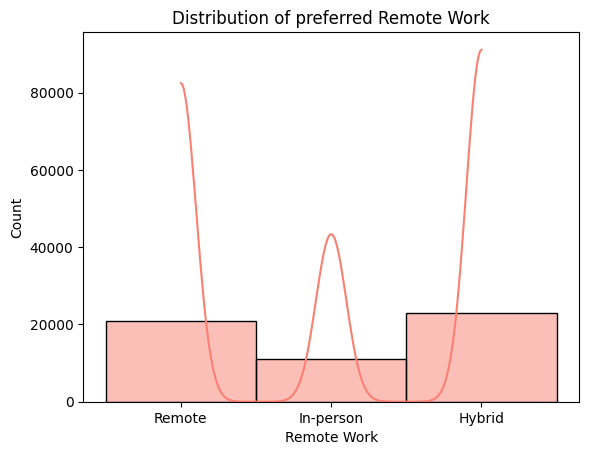

In [71]:
query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
rw_df = pd.read_sql_query(query, conn)

# Shorten values
remote_work = {
    'Hybrid (some remote, some in-person)' : 'Hybrid'
}

rw_df['RemoteWork'] = rw_df["RemoteWork"].replace(remote_work)

# Histogram
sns.histplot(rw_df, x='RemoteWork', discrete=True, kde=True, color='salmon')

plt.title("Distribution of preferred Remote Work")
plt.xlabel("Remote Work")

plt.show()

---

#### VISUALIZING COMPARISON OF DATA

Histogram of `CompTotal` for Ages 45 to 60

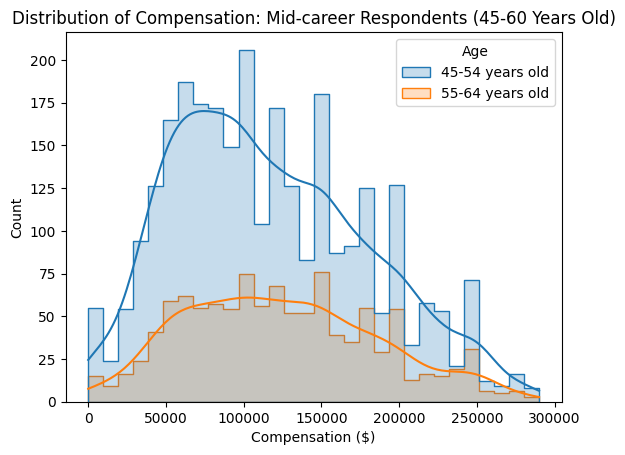

In [78]:
query = "SELECT CompTotal, Age FROM main"
ac_df = pd.read_sql_query(query,conn).dropna()

filtered = ac_df[(ac_df['CompTotal'] < 300000) &
                 ac_df['Age'].isin(['45-54 years old', '55-64 years old'])]

sns.histplot(filtered, x='CompTotal', hue='Age', bins=30, kde=True, element='step')
plt.title('Distribution of Compensation: Mid-career Respondents (45-60 Years Old)')
plt.xlabel('Compensation ($)')

plt.show()

Histogram of Job Satisfaction (`JobSat`) by `YearsCodePro`

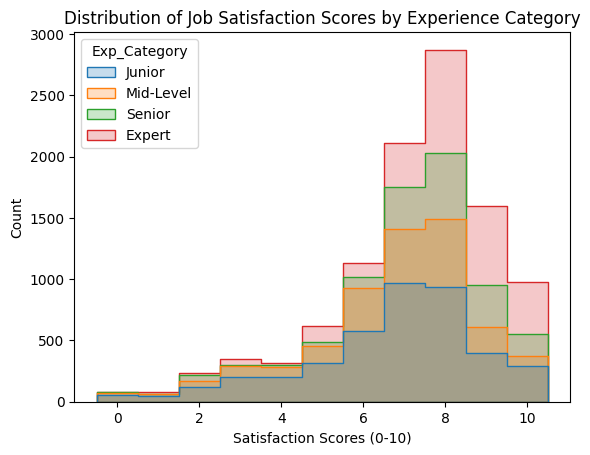

In [86]:
query = "SELECT YearsCodePro, JobSat FROM main"
yj_df = pd.read_sql_query(query, conn).dropna()

# Fix values
years_map = {
    'Less than 1 year' : 0,
    'More than 50 years': 51
}

yj_df['YearsCodePro'] = yj_df["YearsCodePro"].replace(years_map).astype('int')

# Create experience category from 'Junior' to 'Expert'
bins = [-1, 2, 5, 10, 100]
labels = ['Junior', 'Mid-Level', 'Senior', 'Expert']

yj_df['Exp_Category'] = pd.cut(yj_df['YearsCodePro'], bins=bins, labels=labels)

# Histogram
sns.histplot(yj_df, x='JobSat', hue='Exp_Category', discrete=True, element='step')

plt.title('Distribution of Job Satisfaction Scores by Experience Category')
plt.xlabel('Satisfaction Scores (0-10)')

plt.show()

---

In [87]:
conn.close()

---

#### **SUMMARY**

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.